In [1]:
# import packages
import h5py # read h5

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib import rc

import numpy as np
import pandas as pd


In [2]:
# Figure format
rc = {'axes.facecolor':'white',
#       'axes.grid' : False,
      'axes.edgecolor' : '0.15',
      'font.family':'Times New Roman',
      'axes.linewidth' :2} 
# lack of font size
plt.rcParams.update(rc)

In [4]:
# Read h5 files
f1 = h5py.File('/Users/wangqiaoyiru/Desktop/py_code/h5test/preload_strainchangerate.h5','r')
f2 = h5py.File('/Users/wangqiaoyiru/Desktop/py_code/h5test/preload_strainchange.h5','r')

print(list(f1.keys()))

['data', 'depth', 'stamps', 'stamps_unix']


In [6]:
# Assign variables
dstrain = (f2['data'])
dep = (f2['depth'])
date_plot = (f2['stamps'])

In [9]:
type(dstrain)

h5py._hl.dataset.Dataset

In [13]:
dstrain = np.array(dstrain)
print(type(dstrain))

<class 'numpy.ndarray'>


In [8]:
# use panda package
# print(pd.DataFrame(date_plot)) 
print(pd.DataFrame(dep)) 

                  0
0          0.121472
1          0.455799
2          0.786826
3          1.121103
4          1.455431
...             ...
56809  18922.093750
56810  18922.423828
56811  18922.757812
56812  18923.091797
56813  18923.423828

[56814 rows x 1 columns]


<Figure size 14400x7200 with 0 Axes>

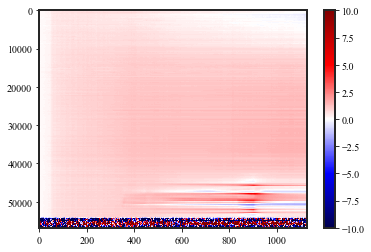

In [14]:
# waterfall plot
dstrain = np.array(dstrain)
strain_T = dstrain.T

plt.figure(figsize=(12,6),dpi = 1200)
plt.figure(figsize=(6,4))
plt.imshow(strain_T,aspect='auto',cmap='seismic')
plt.colorbar()
plt.clim(-10,10)
# plt.savefig('waterfall_cor_v1.svg')
plt.show()

In [17]:
# download and install Dr. Jin's python package, click the url below for more details
# !git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal
from jin_pylib import Data2D_XT

In [8]:
# !git clone https://github.com/jinwar/jin_pylib

fatal: destination path 'jin_pylib' already exists and is not an empty directory.


In [18]:
date_plot = np.array(date_plot)

In [19]:
startDate = datetime.datetime(2022,1,4,20,46,10)
tdelta = np.ones(len(date_plot))*145 # 145 is the time interval

t = []
t.append(1)

for i in range(1,len(tdelta)):
    t.append(t[i-1] +145)

In [20]:
data = dstrain;

# creating a Data2D class instance

DASdata = Data2D_XT.Data2D() # initiate instance
DASdata.data = data.T   # DAS data in 2D array, the first axis is distance and second axis is time
# DASdata.taxis = np.arange(data.shape[0])  # 1D array for time grid, unit in second. 
# DASdata.taxis = pd.date_range(start = date_plot[0],end = date_plot[-1],periods = len(date_plot))

DASdata.taxis = t

DASdata.daxis = np.arange(data.shape[1])*0.333  # 1D array for distance grid, unit in ft
DASdata.start_time = datetime.datetime(2022,1,4,20,46,10)
# DASdata.start_time = date_plot[0]

DASdata.daxis[-1]
print(DASdata.data.shape)

(56814, 1129)


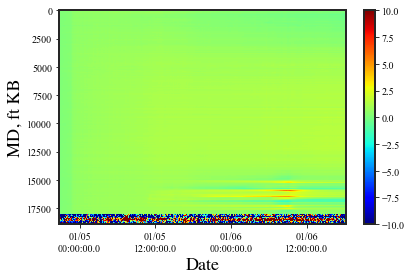

In [21]:
# cx = np.array([-1,1])
# DASdata.plot_waterfall(timescale='second',use_timestamp=True,timefmt = '%m/%d\n%H:%M:%S.{ms}')
DASdata.plot_waterfall(timescale='second',use_timestamp=True,cmap=plt.get_cmap('jet'))
ax = plt.gca()
plt.clim(-10,10)
plt.colorbar()
plt.ylabel("MD, ft KB", fontweight = 'bold', fontsize=18, fontname="Times")
plt.xlabel('Date',fontweight = 'bold',fontsize=18, fontname="Times")
plt.tight_layout()
# plt.yticks([0, 10000, 20000], [dep[0],dep[10000-1],dep[20000-1]])
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %H %M"))
plt.savefig('waterfall_ori.svg')

In [22]:
start_MD = 30000 # Fiber range : 12000ft
end_MD = 53000 # Fiber range

chosenMD = (np.arange(5)-2)+(22173 + start_MD) #index
eltsMD = dep[:end_MD][chosenMD] 

In [25]:
np.where(dep[0:-1] > 12000)[0]

array([36027, 36028, 36029, ..., 56810, 56811, 56812])

In [23]:
# Tricks of date plot
startDate = datetime.datetime(2022,1,4,20,46,10)
tdelta = np.ones(len(date_plot))*145 # 145 is the time interval

t_date = []
t_date.append(startDate)

for i in range(1,len(tdelta)):
    t_date.append(t_date[i-1] + datetime.timedelta(seconds = tdelta[i]))


<Figure size 432x288 with 0 Axes>

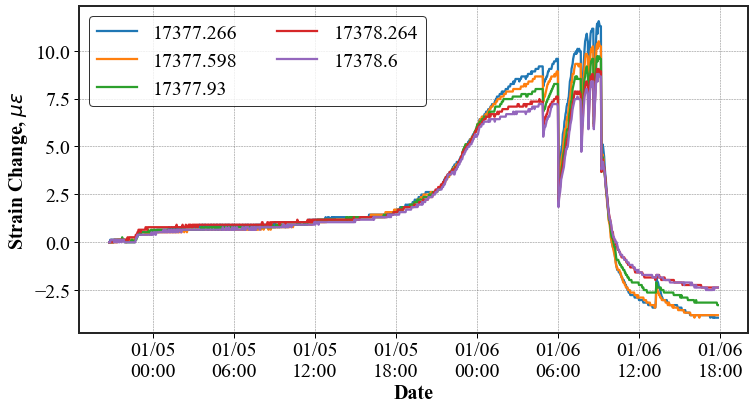

In [24]:
plt.figure()
fig, ax = plt.subplots(figsize = (12,6))
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(width=1, length=5)

for i in range(len(chosenMD)):
    plt.plot(t_date[:1120], dstrain[:1120,chosenMD[i]], linewidth = 2.25,label = eltsMD[i] )
    plt.xlabel("Date", fontweight = 'bold', fontsize=20)
    plt.ylabel('Strain Change, $\mu\epsilon$',fontweight = 'bold',fontsize=20)
    plt.legend(loc='best',ncol = 2,
               fontsize = 20, edgecolor = 'black')
# plt.plot(t_date[:1120],dstrain[:1120,52173])
plt.tick_params(axis='both', which='minor', labelsize=20)
ax.grid(color='gray', linestyle='--', linewidth = 0.5)
plt.tick_params(axis='both', which='major', labelsize=20, direction='out',
                top=False, right=False)
ax = plt.gca()
ax.xaxis_date()
date_format = mdates.DateFormatter('%m/%d\n%H:%M')
ax.xaxis.set_major_formatter(date_format)
# ax.tick_params(axis='x',labelrotation=45)
# plt.savefig(f'ori_chan{chosenMD[0]}.svg')